In [94]:
import pandas as pd

In [95]:
df = pd.read_csv('/Users/juliandiaz/Desktop/final_project/conditions.csv')

In [96]:
df.drop(columns=['Flag','Start Date','End Date','Data As Of','Year','Month','Number of Mentions'],inplace=True)

In [97]:
df = df[df['Group'] == 'By Total']

In [98]:
df = df.dropna()

In [99]:
df.Condition.value_counts()

COVID-19                                                                     522
All other conditions and causes (residual)                                   518
Influenza and pneumonia                                                      510
Respiratory failure                                                          500
Adult respiratory distress syndrome                                          487
Obesity                                                                      481
Other diseases of the circulatory system                                     477
Hypertensive diseases                                                        477
Vascular and unspecified dementia                                            470
Diabetes                                                                     469
Renal failure                                                                465
Cardiac arrest                                                               465
Sepsis                      

In [100]:
df.drop(['ICD10_codes'],axis=1,inplace=True)
df.drop(['Group'],axis=1,inplace=True)

In [101]:
df.reset_index(drop=True)

,State,Condition Group,Condition,Age Group,COVID-19 Deaths
0,United States,Respiratory diseases,Influenza and pneumonia,0-24,1536.0
1,United States,Respiratory diseases,Influenza and pneumonia,25-34,5751.0
2,United States,Respiratory diseases,Influenza and pneumonia,35-44,14980.0
3,United States,Respiratory diseases,Influenza and pneumonia,45-54,37208.0
4,United States,Respiratory diseases,Influenza and pneumonia,55-64,82072.0
...,...,...,...,...,...
10696,Puerto Rico,COVID-19,COVID-19,55-64,767.0
10697,Puerto Rico,COVID-19,COVID-19,65-74,1217.0
10698,Puerto Rico,COVID-19,COVID-19,75-84,1587.0
10699,Puerto Rico,COVID-19,COVID-19,85+,1623.0


In [102]:
df = df[~df['State'].str.contains('Puerto Rico')]

In [103]:
df

,State,Condition Group,Condition,Age Group,COVID-19 Deaths
0,United States,Respiratory diseases,Influenza and pneumonia,0-24,1536.0
1,United States,Respiratory diseases,Influenza and pneumonia,25-34,5751.0
2,United States,Respiratory diseases,Influenza and pneumonia,35-44,14980.0
3,United States,Respiratory diseases,Influenza and pneumonia,45-54,37208.0
4,United States,Respiratory diseases,Influenza and pneumonia,55-64,82072.0
...,...,...,...,...,...
12185,Wyoming,COVID-19,COVID-19,65-74,425.0
12186,Wyoming,COVID-19,COVID-19,75-84,494.0
12187,Wyoming,COVID-19,COVID-19,85+,489.0
12188,Wyoming,COVID-19,COVID-19,Not stated,0.0


In [104]:
df.State.value_counts()

United States           230
Texas                   223
California              220
Arizona                 218
Ohio                    217
Georgia                 217
Florida                 216
Pennsylvania            214
North Carolina          214
Michigan                212
Tennessee               211
Oklahoma                209
Alabama                 209
Mississippi             208
Louisiana               207
New York City           207
Missouri                206
Illinois                206
South Carolina          205
New Jersey              205
Colorado                203
Washington              203
Massachusetts           202
Virginia                202
Arkansas                199
Wisconsin               199
Maryland                199
Indiana                 199
Minnesota               199
West Virginia           199
New York                198
Utah                    196
Nevada                  196
Kentucky                195
New Mexico              194
Nebraska            

In [105]:
df

,State,Condition Group,Condition,Age Group,COVID-19 Deaths
0,United States,Respiratory diseases,Influenza and pneumonia,0-24,1536.0
1,United States,Respiratory diseases,Influenza and pneumonia,25-34,5751.0
2,United States,Respiratory diseases,Influenza and pneumonia,35-44,14980.0
3,United States,Respiratory diseases,Influenza and pneumonia,45-54,37208.0
4,United States,Respiratory diseases,Influenza and pneumonia,55-64,82072.0
...,...,...,...,...,...
12185,Wyoming,COVID-19,COVID-19,65-74,425.0
12186,Wyoming,COVID-19,COVID-19,75-84,494.0
12187,Wyoming,COVID-19,COVID-19,85+,489.0
12188,Wyoming,COVID-19,COVID-19,Not stated,0.0


In [106]:
# Assuming your original dataframe is called "df"
ml_df = df.drop(["State", "Condition Group"], axis=1)

In [107]:
ml_df

,Condition,Age Group,COVID-19 Deaths
0,Influenza and pneumonia,0-24,1536.0
1,Influenza and pneumonia,25-34,5751.0
2,Influenza and pneumonia,35-44,14980.0
3,Influenza and pneumonia,45-54,37208.0
4,Influenza and pneumonia,55-64,82072.0
...,...,...,...
12185,COVID-19,65-74,425.0
12186,COVID-19,75-84,494.0
12187,COVID-19,85+,489.0
12188,COVID-19,Not stated,0.0


In [108]:
ml_df = ml_df[~ml_df["Age Group"].isin(["Not stated", "All Ages"])]

In [109]:
ml_df = ml_df[~ml_df["Condition"].isin(["COVID-19","All other conditions and causes (residual)"])]

In [110]:
ml_df

,Condition,Age Group,COVID-19 Deaths
0,Influenza and pneumonia,0-24,1536.0
1,Influenza and pneumonia,25-34,5751.0
2,Influenza and pneumonia,35-44,14980.0
3,Influenza and pneumonia,45-54,37208.0
4,Influenza and pneumonia,55-64,82072.0
...,...,...,...
12160,"Intentional and unintentional injury, poisonin...",0-24,0.0
12164,"Intentional and unintentional injury, poisonin...",55-64,11.0
12165,"Intentional and unintentional injury, poisonin...",65-74,26.0
12166,"Intentional and unintentional injury, poisonin...",75-84,29.0


In [111]:
ml_df.Condition.value_counts()

Influenza and pneumonia                                                      403
Respiratory failure                                                          389
Adult respiratory distress syndrome                                          374
Obesity                                                                      370
Hypertensive diseases                                                        367
Other diseases of the circulatory system                                     365
Diabetes                                                                     359
Vascular and unspecified dementia                                            357
Renal failure                                                                354
Cardiac arrest                                                               352
Sepsis                                                                       351
Other diseases of the respiratory system                                     349
Alzheimer disease           

In [112]:
ml_df

,Condition,Age Group,COVID-19 Deaths
0,Influenza and pneumonia,0-24,1536.0
1,Influenza and pneumonia,25-34,5751.0
2,Influenza and pneumonia,35-44,14980.0
3,Influenza and pneumonia,45-54,37208.0
4,Influenza and pneumonia,55-64,82072.0
...,...,...,...
12160,"Intentional and unintentional injury, poisonin...",0-24,0.0
12164,"Intentional and unintentional injury, poisonin...",55-64,11.0
12165,"Intentional and unintentional injury, poisonin...",65-74,26.0
12166,"Intentional and unintentional injury, poisonin...",75-84,29.0


In [113]:
ml_df['Condition'].value_counts()

Influenza and pneumonia                                                      403
Respiratory failure                                                          389
Adult respiratory distress syndrome                                          374
Obesity                                                                      370
Hypertensive diseases                                                        367
Other diseases of the circulatory system                                     365
Diabetes                                                                     359
Vascular and unspecified dementia                                            357
Renal failure                                                                354
Cardiac arrest                                                               352
Sepsis                                                                       351
Other diseases of the respiratory system                                     349
Alzheimer disease           

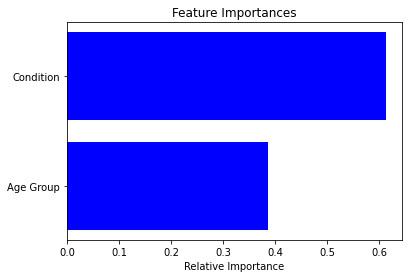

In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

le_condition = LabelEncoder()
ml_df['Condition_encoded'] = le_condition.fit_transform(ml_df['Condition'])

le_age_group = LabelEncoder()
ml_df['Age_group_encoded'] = le_age_group.fit_transform(ml_df['Age Group'])


X = ml_df[['Condition_encoded', 'Age_group_encoded']]
y = ml_df['COVID-19 Deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


importances = rf.feature_importances_


features = ['Condition', 'Age Group']
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [116]:
from sklearn.metrics import mean_squared_error


In [117]:
y_pred = rf.predict(X_test)


In [118]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [119]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 13992370.575411152
Root Mean Squared Error: 3740.6377230909643
